In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import json
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [3]:
filepath = '/kaggle/input/deepsigio-hdf5-dataset-uncompressed/GOLD_XYZ_OSC.0001_1024.hdf5'

In [4]:
with h5py.File(filepath, 'r') as f:
    X = f['X'][:]
    Y = f['Y'][:]
    Z = f['Z'][:]

In [4]:
frame_index = 0
example_frame = X[frame_index]
I = example_frame[:, 0]
Q = example_frame[:, 1]

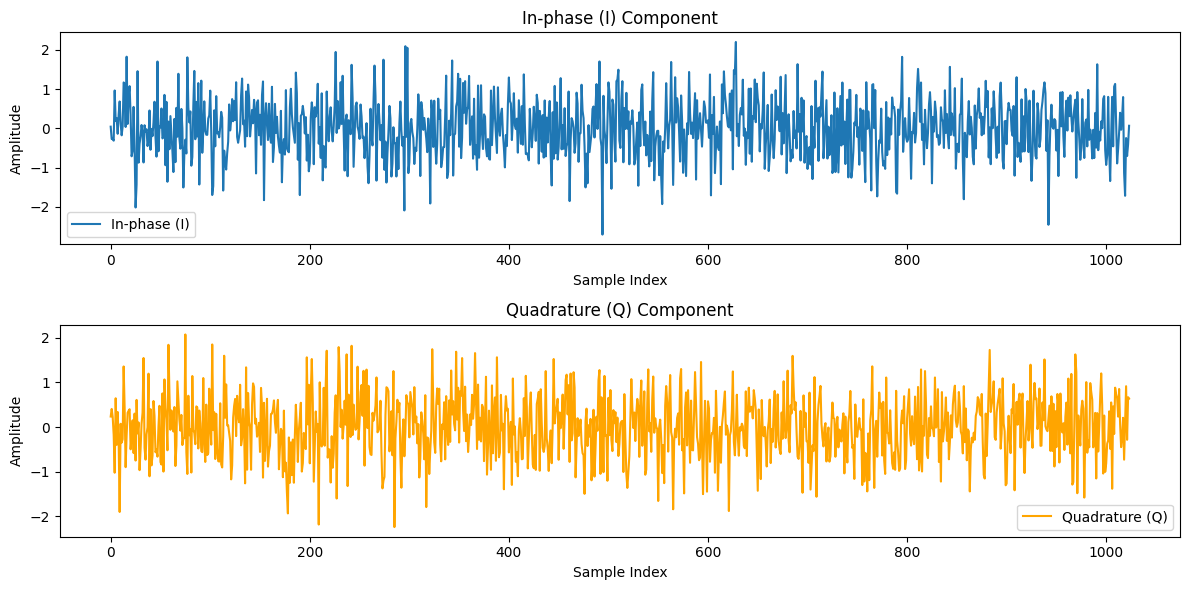

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(I, label='In-phase (I)')
plt.title('In-phase (I) Component')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(Q, label='Quadrature (Q)', color='orange')
plt.title('Quadrature (Q) Component')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
print(I.shape,Q.shape)
print(X.shape)
print(Y.shape)
print(Z.shape)

(1024,) (1024,)
(2555904, 1024, 2)
(2555904, 24)
(2555904, 1)


In [ ]:
batch_size = 32
test_size = 0.2 
val_size = 0.2 

X_train_val, X_test, Y_train_val, Y_test, Z_train_val, Z_test = train_test_split(X, Y, Z, test_size=test_size, random_state=42)

X_train, X_val, Y_train, Y_val, Z_train, Z_val = train_test_split(X_train_val, Y_train_val, Z_train_val, test_size=val_size/(1-test_size), random_state=42)